# Setup & Load Data

In [1]:
# ref: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/
from __future__ import unicode_literals
import os
import sys
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
from vistools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes


data_path = '../enertalk-dataset/'
overall_fontsize = 40
hours = mdates.MinuteLocator(interval = 60, tz = timezone('Asia/Seoul'))
h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))

app_name = 'fridge'
psn_lst = ['04', '05', '06', '16', '18', '19']
date_lst = ['20161110', '20161024', '20160923', '20161110', '20160925', '20161024']
df_lst = []
for i in range(len(psn_lst)):
    psn = psn_lst[i]
    date = date_lst[i]
    row = int((i)/3)
    col = (i)%3
    print(psn, date)
    app_fname = [fname for fname in os.listdir(data_path+psn+'/'+date) if app_name in fname][0]
    date_for_timestamp = date[0:4]+'-'+date[4:6]+'-'+date[6:8]
    df = pd.read_parquet(data_path+psn+'/'+date+'/'+app_fname )
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = get_specific_duration(df, date_for_timestamp + ' 01:00:00', date_for_timestamp + ' 05:00:00')
    df_lst.append(df)

04 20161110
05 20161024
06 20160923
16 20161110
18 20160925
19 20161024


# Visualize Figure 6. Snippets of six refrigerators from six different houses.

04 20161110
05 20161024
06 20160923
16 20161110
18 20160925
19 20161024


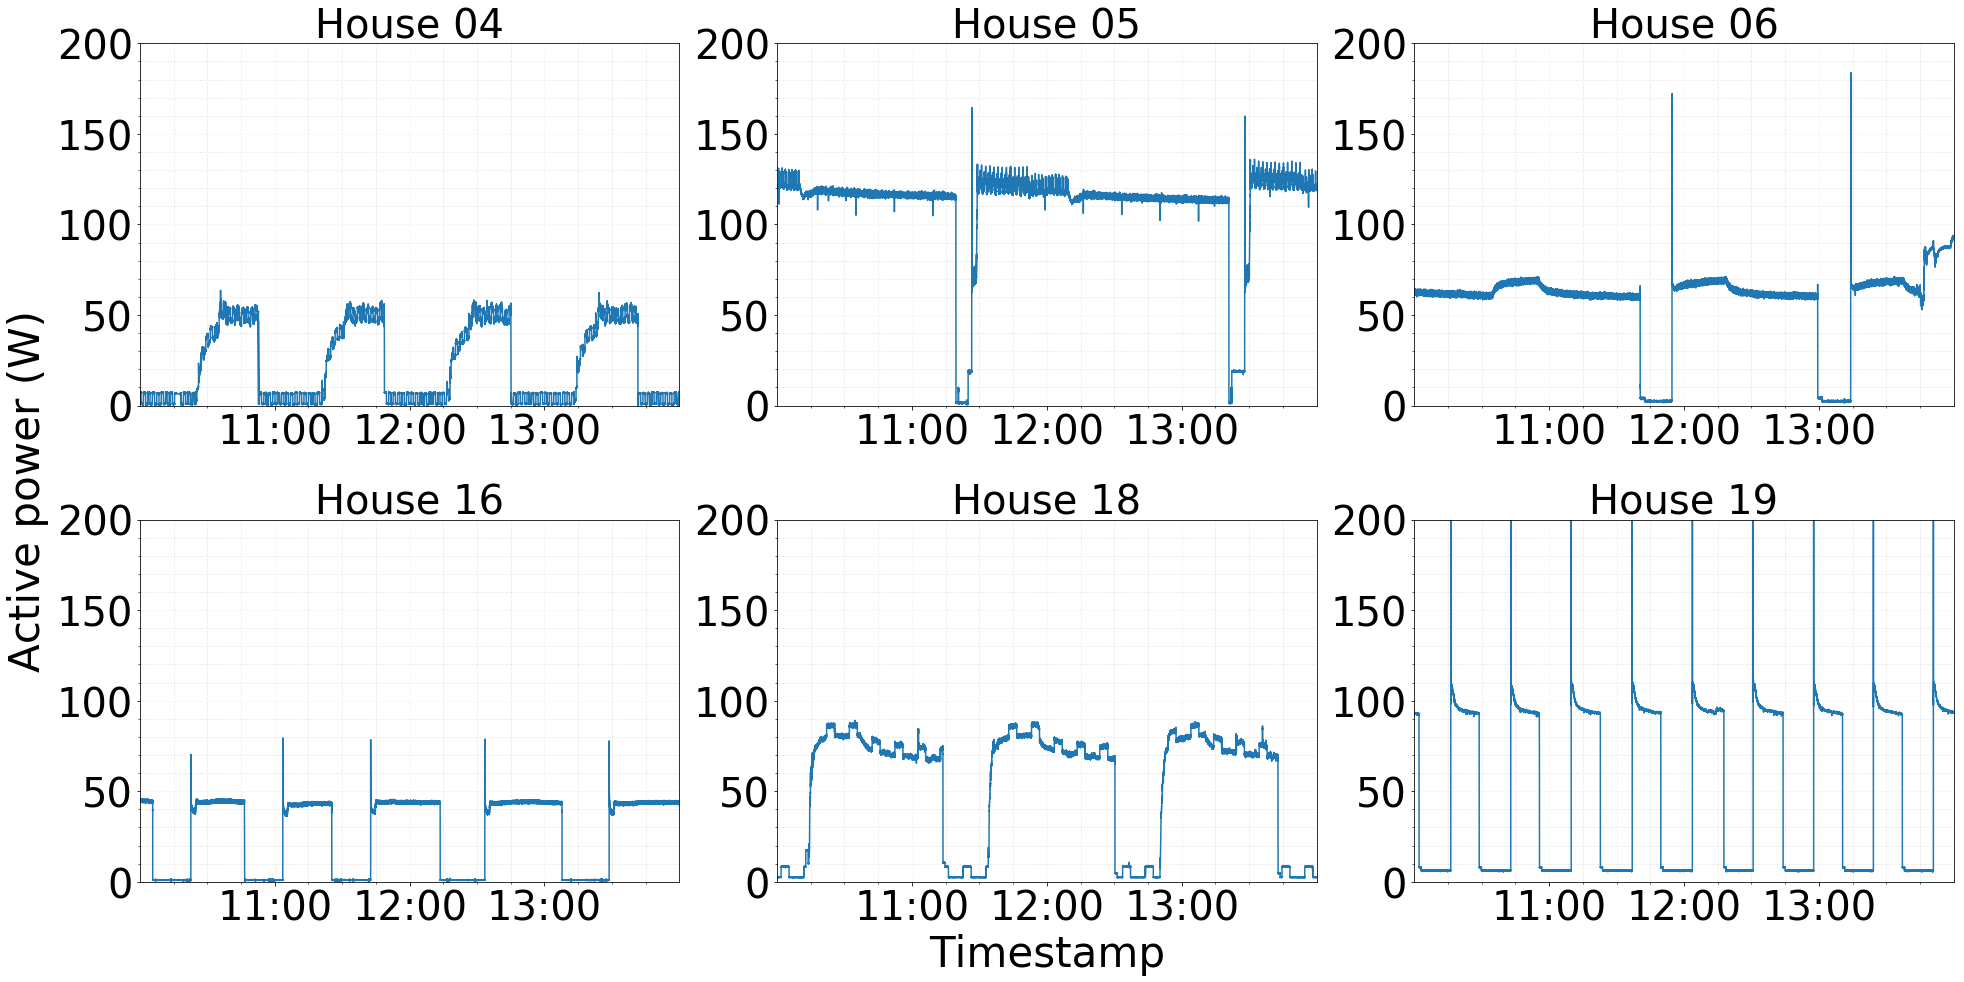

In [2]:
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
fig, axes = plt.subplots(2, 3, figsize=(fig_width*3, fig_height*2.5), sharex = False, sharey = False)
for i in range(len(psn_lst)):
    psn = psn_lst[i]
    date = date_lst[i]
    row = int((i)/3)
    col = (i)%3
    print(psn, date)
    df = df_lst[i]
    ax = axes[row, col]    
    app_color = get_app_color(app_name)
    ax.plot(df['timestamp'], df['active_power'], color=app_color)
    hours = mdates.MinuteLocator(interval = 60, tz = timezone('Asia/Seoul'))
    h_fmt = mdates.DateFormatter('%H:%M', tz = timezone('Asia/Seoul'))
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.tick_params(axis='both', labelsize=overall_fontsize)
    year = int(date[:4])
    month = int(date[4:6])
    day = int(date[6:8])
    ax.set_xlim([datetime.datetime(year,month,day,1,0,0), datetime.datetime(year,month,day,5,0,0)])
    ax.set_xticks([datetime.datetime(year,month,day,2,0,0),
                  datetime.datetime(year,month,day,3,0,0),
                  datetime.datetime(year,month,day,4,0,0)])
    ax.set_ylim([0,200])
    ax.set_title('House '+ psn, fontsize = overall_fontsize)
    if (row==1) & (col==1):
        ax.set_xlabel('Timestamp', fontsize=overall_fontsize+2)
    plt.xticks()

fig.tight_layout(h_pad=3)    
fig.text(-0.02, 0.5, 'Active power (W)', va='center', rotation='vertical',  fontsize=overall_fontsize+2)
plt.show()
